# Absenteeism at work Data Set 


## Data Set Information:

The data set allows for several new combinations of attributes and attribute exclusions, or the modification of the attribute type (categorical, integer, or real) depending on the purpose of the research.The data set (Absenteeism at work - Part I) was used in academic research at the Universidade Nove de Julho - Postgraduate Program in Informatics and Knowledge Management.


## Attribute Information:

1. Individual identification (ID) 
2. Reason for absence (ICD). 
Absences attested by the International Code of Diseases (ICD) stratified into 21 categories (I to XXI) as follows: 

I Certain infectious and parasitic diseases 

II Neoplasms 

III Diseases of the blood and blood-forming organs and certain disorders involving the immune mechanism 

IV Endocrine, nutritional and metabolic diseases 

V Mental and behavioural disorders 

VI Diseases of the nervous system 

VII Diseases of the eye and adnexa 

VIII Diseases of the ear and mastoid process 

IX Diseases of the circulatory system 

X Diseases of the respiratory system 

XI Diseases of the digestive system 

XII Diseases of the skin and subcutaneous tissue 

XIII Diseases of the musculoskeletal system and connective tissue 

XIV Diseases of the genitourinary system 

XV Pregnancy, childbirth and the puerperium 

XVI Certain conditions originating in the perinatal period 

XVII Congenital malformations, deformations and chromosomal abnormalities 

XVIII Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified 

XIX Injury, poisoning and certain other consequences of external causes

XX External causes of morbidity and mortality 

XXI Factors influencing health status and contact with health services. 

And 7 categories without (CID) patient follow-up (22), medical consultation (23), blood donation (24), laboratory examination (25), unjustified absence (26), physiotherapy (27), dental consultation (28).

3. Month of absence 
4. Day of the week (Monday (2), Tuesday (3), Wednesday (4), Thursday (5), Friday (6)) 
5. Seasons (summer (1), autumn (2), winter (3), spring (4)) 
6. Transportation expense 
7. Distance from Residence to Work (kilometers) 
8. Service time 
9. Age 
10. Work load Average/day 
11. Hit target 
12. Disciplinary failure (yes=1; no=0) 
13. Education (high school (1), graduate (2), postgraduate (3), master and doctor (4)) 
14. Son (number of children) 
15. Social drinker (yes=1; no=0) 
16. Social smoker (yes=1; no=0) 
17. Pet (number of pet) 
18. Weight 
19. Height 
20. Body mass index 
21. Absenteeism time in hours (target) 

.arff header for Weka: 

## @relation Absenteeism_at_work 

@attribute ID {31.0, 27.0, 19.0, 30.0, 7.0, 20.0, 24.0, 32.0, 3.0, 33.0, 26.0, 29.0, 18.0, 25.0, 17.0, 14.0, 16.0, 23.0, 2.0, 21.0, 36.0, 15.0, 22.0, 5.0, 12.0, 9.0, 6.0, 34.0, 10.0, 28.0, 13.0, 11.0, 1.0, 4.0, 8.0, 35.0} 

@attribute Reason_for_absence {17.0, 3.0, 15.0, 4.0, 21.0, 2.0, 9.0, 24.0, 18.0, 1.0, 12.0, 5.0, 16.0, 7.0, 27.0, 25.0, 8.0, 10.0, 26.0, 19.0, 28.0, 6.0, 23.0, 22.0, 13.0, 14.0, 11.0, 0.0} 

@attribute Month_of_absence REAL 

@attribute Day_of_the_week {5.0, 2.0, 3.0, 4.0, 6.0} 

@attribute Seasons {4.0, 1.0, 2.0, 3.0} 

@attribute Transportation_expense REAL 

@attribute Distance_from_Residence_to_Work REAL 

@attribute Service_time INTEGER 

@attribute Age INTEGER 

@attribute Work_load_Average/day_ REAL 

@attribute Hit_target REAL 

@attribute Disciplinary_failure {1.0, 0.0} 

@attribute Education REAL 

@attribute Son REAL 

@attribute Social_drinker {1.0, 0.0} 

@attribute Social_smoker {1.0, 0.0} 

@attribute Pet REAL 

@attribute Weight REAL 

@attribute Height REAL 

@attribute Body_mass_index REAL 

@attribute Absenteeism_time_in_hours REAL


### Source:

Creators original owner and donors: Andrea Martiniano (1), Ricardo Pinto Ferreira (2), and Renato Jose Sassi (3). 


#### Importing or calling all necessary models

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from scipy.stats import zscore
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

## DataSet:
### Loading / Cleaning / Formatting

In [2]:
df=pd.read_csv('Absenteeism_at_work.csv')
df

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,11,14,7,3,1,289,36,13,33,264.604,...,0,1,2,1,0,1,90,172,30,8
736,1,11,7,3,1,235,11,14,37,264.604,...,0,3,1,0,0,1,88,172,29,4
737,4,0,0,3,1,118,14,13,40,271.219,...,0,1,1,1,0,8,98,170,34,0
738,8,0,0,4,2,231,35,14,39,271.219,...,0,1,2,1,0,2,100,170,35,0


In [3]:
df=pd.DataFrame(data=df)
df

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,11,14,7,3,1,289,36,13,33,264.604,...,0,1,2,1,0,1,90,172,30,8
736,1,11,7,3,1,235,11,14,37,264.604,...,0,3,1,0,0,1,88,172,29,4
737,4,0,0,3,1,118,14,13,40,271.219,...,0,1,1,1,0,8,98,170,34,0
738,8,0,0,4,2,231,35,14,39,271.219,...,0,1,2,1,0,2,100,170,35,0


In [4]:
#First five data rows of the data
df.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2


In [5]:
#Last five data rows of the data
df.tail()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
735,11,14,7,3,1,289,36,13,33,264.604,...,0,1,2,1,0,1,90,172,30,8
736,1,11,7,3,1,235,11,14,37,264.604,...,0,3,1,0,0,1,88,172,29,4
737,4,0,0,3,1,118,14,13,40,271.219,...,0,1,1,1,0,8,98,170,34,0
738,8,0,0,4,2,231,35,14,39,271.219,...,0,1,2,1,0,2,100,170,35,0
739,35,0,0,6,3,179,45,14,53,271.219,...,0,1,1,0,0,1,77,175,25,0


In [6]:
#Shape of the data 
df.shape

(740, 21)

In [7]:
#Information regarding our data:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               740 non-null    int64  
 1   Reason for absence               740 non-null    int64  
 2   Month of absence                 740 non-null    int64  
 3   Day of the week                  740 non-null    int64  
 4   Seasons                          740 non-null    int64  
 5   Transportation expense           740 non-null    int64  
 6   Distance from Residence to Work  740 non-null    int64  
 7   Service time                     740 non-null    int64  
 8   Age                              740 non-null    int64  
 9   Work load Average/day            740 non-null    float64
 10  Hit target                       740 non-null    int64  
 11  Disciplinary failure             740 non-null    int64  
 12  Education             

In [8]:
df.describe()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,...,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,18.017568,19.216216,6.324324,3.914865,2.544595,221.329730,29.631081,12.554054,36.450000,271.490235,...,0.054054,1.291892,1.018919,0.567568,0.072973,0.745946,79.035135,172.114865,26.677027,6.924324
std,11.021247,8.433406,3.436287,1.421675,1.111831,66.952223,14.836788,4.384873,6.478772,39.058116,...,0.226277,0.673238,1.098489,0.495749,0.260268,1.318258,12.883211,6.034995,4.285452,13.330998
min,1.000000,0.000000,0.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,205.917000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,9.000000,13.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,244.387000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,18.000000,23.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,264.249000,...,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,28.000000,26.000000,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,294.217000,...,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,378.884000,...,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


The Description here shows that the mean, standard deviation minimum and maximum value of each variables: such as if we consider the Age of the employees then our count is 740 , avaerage age is 36.45 where the standard deviation is at 6.47. Looking at the minimum and maximum age which is at 27 -min , 58-max. Median of age is at 37 where 1st quartilr is 31 and 3rd one is at 40. Like wishe we could see all the variables or attributed description for the above given data.

In [9]:
#Mean time of the absence:
df['Absenteeism time in hours'].mean()

6.924324324324324

### Checking Uniqueness

In [10]:
df['Reason for absence'].unique()

array([26,  0, 23,  7, 22, 19,  1, 11, 14, 21, 10, 13, 28, 18, 25, 24,  6,
       27, 17,  8, 12,  5,  9, 15,  4,  3,  2, 16])

In [11]:
df['Absenteeism time in hours'].unique()

array([  4,   0,   2,   8,  40,   1,   7,   3,  32,   5,  16,  24,  64,
        56,  80, 120, 112, 104,  48])

In [12]:
df['Seasons'].unique()

array([1, 4, 2, 3])

In [13]:
df['Body mass index'].unique()

array([30, 31, 24, 27, 23, 25, 29, 32, 22, 33, 21, 28, 38, 19, 36, 35, 34])

### Checking Missing Values

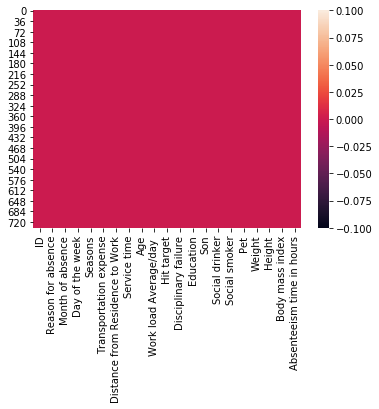

In [14]:
sns.heatmap(df.isnull())

The above graph is here to show that if there are any null values in the above dataset, I have found out that the red color shows the '0' value here, it means that none of the value is empty(Null Values).

In order to get more clearity we have taken out the sum of the total Null Values down which is also giving us the same output that is , ' 0 ' .

In [15]:
df.isnull().sum()

ID                                 0
Reason for absence                 0
Month of absence                   0
Day of the week                    0
Seasons                            0
Transportation expense             0
Distance from Residence to Work    0
Service time                       0
Age                                0
Work load Average/day              0
Hit target                         0
Disciplinary failure               0
Education                          0
Son                                0
Social drinker                     0
Social smoker                      0
Pet                                0
Weight                             0
Height                             0
Body mass index                    0
Absenteeism time in hours          0
dtype: int64

### Data Visualization

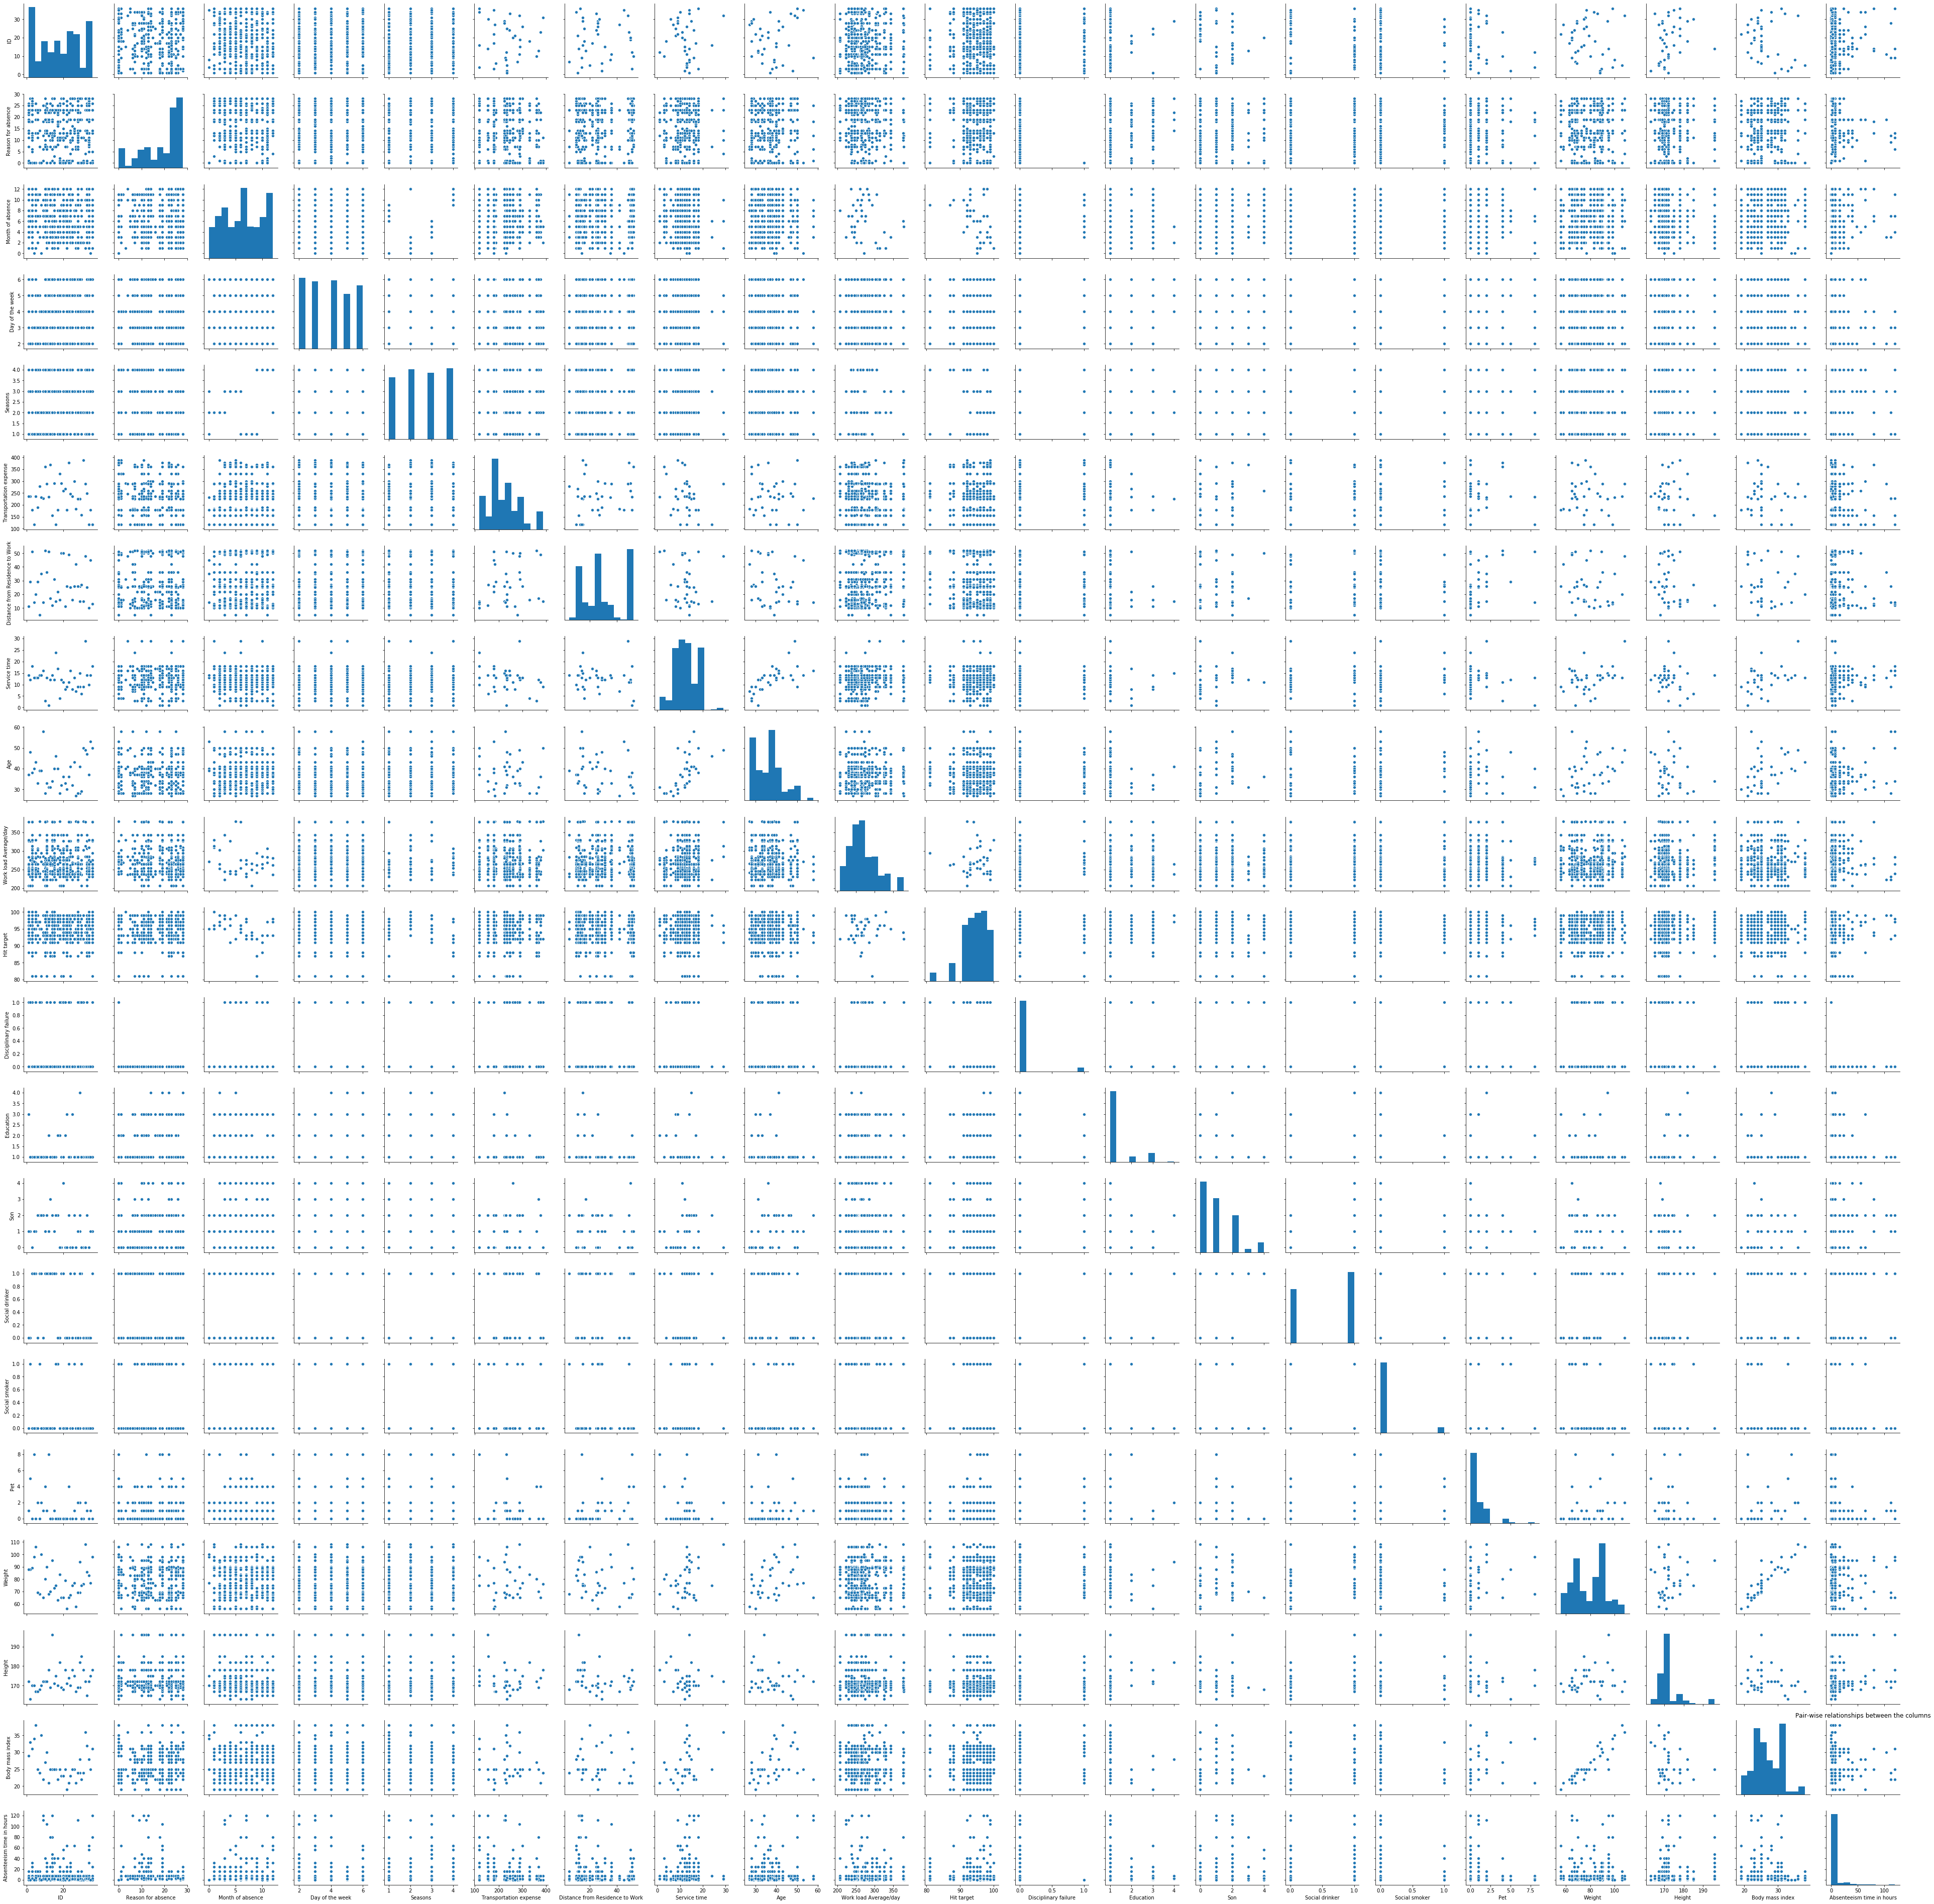

In [16]:
ax = sns.pairplot(df)
plt.title('Pair-wise relationships between the columns')
plt.show()

Pairplot has been constucted above to show or allow us the see both the distribution of each variables and also to show the relationship between each of the two variables, "/" -->shows the positive corelation where as "\" -->shows negative corelation for some there are holizontal lines which shows neutral relationship with each other.

Through the above and below graph we have come accros to the attributes or the fields which are positively corelated or neutral corelated to each other, Hence we would be taking all of them in to the consideration. 

But there is one field which is showing negative correlation with the targeted variable (Absenteeism time in hours) is the ID column which is of no use in the prediction model.

Thus, we will remove this column.

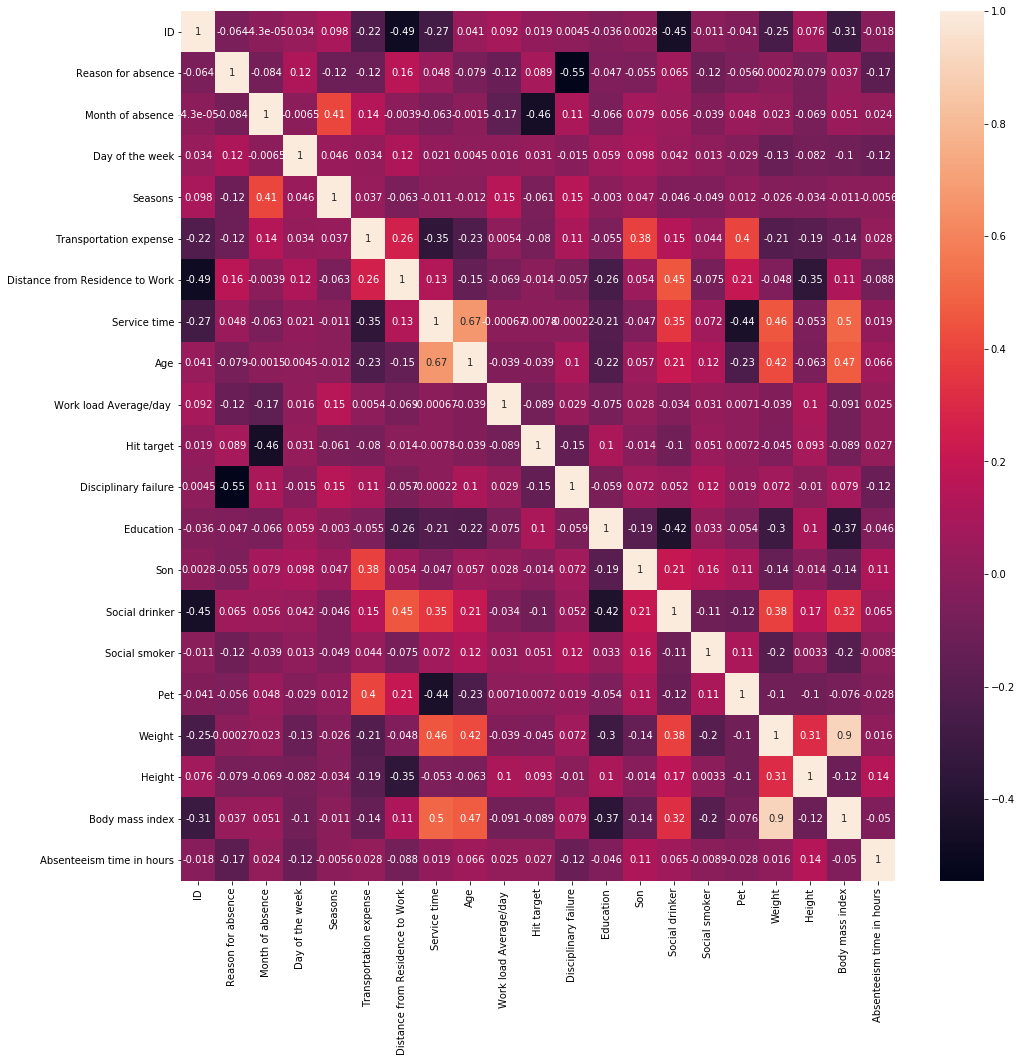

In [17]:
corr_hmap=df.corr()
plt.figure(figsize=(16,16))
sns.heatmap(corr_hmap,annot=True)
plt.show()

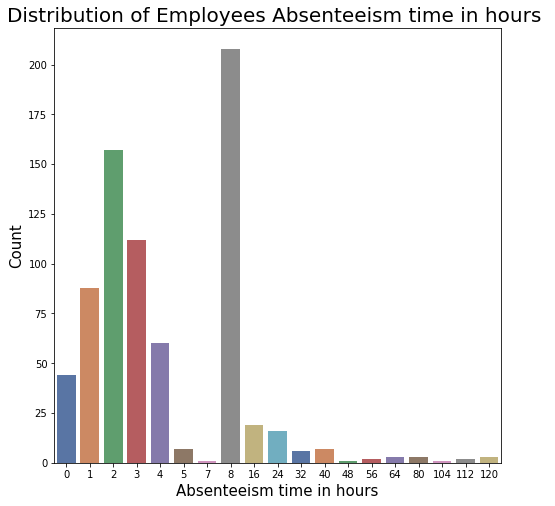

In [18]:
#Data distribution of the Target Variable:

plt.figure(figsize=(8,8))
sns.countplot(x = df['Absenteeism time in hours'],palette='deep')
plt.xlabel('Absenteeism time in hours', fontsize= 15)
plt.ylabel('Count', fontsize= 15)
plt.title("Distribution of Employees Absenteeism time in hours ",fontsize= 20)
plt.show()

The Above graph shows the Distribution of employees with respect to the Absenteesm time in hours. It has been interpreted that 8 hrs absenteeism took place by most of the employees which is followed by 2,3 and 1 hrs.

### Checking data distribution with respect to target variable

In [19]:
def dis_bar(x,y):
    
    df.groupby([x,y]).size().unstack(level=-1).plot(kind='bar', figsize=(35,10))
    plt.xlabel(x,fontsize= 25)
    plt.ylabel('count',fontsize= 25)
    plt.legend(loc=0,fontsize= 25)
    plt.xticks(fontsize=30)
    plt.yticks(fontsize=30)
    plt.title("{X} Vs {Y}".format(X=x,Y=y),fontsize = 50)
    plt.show()

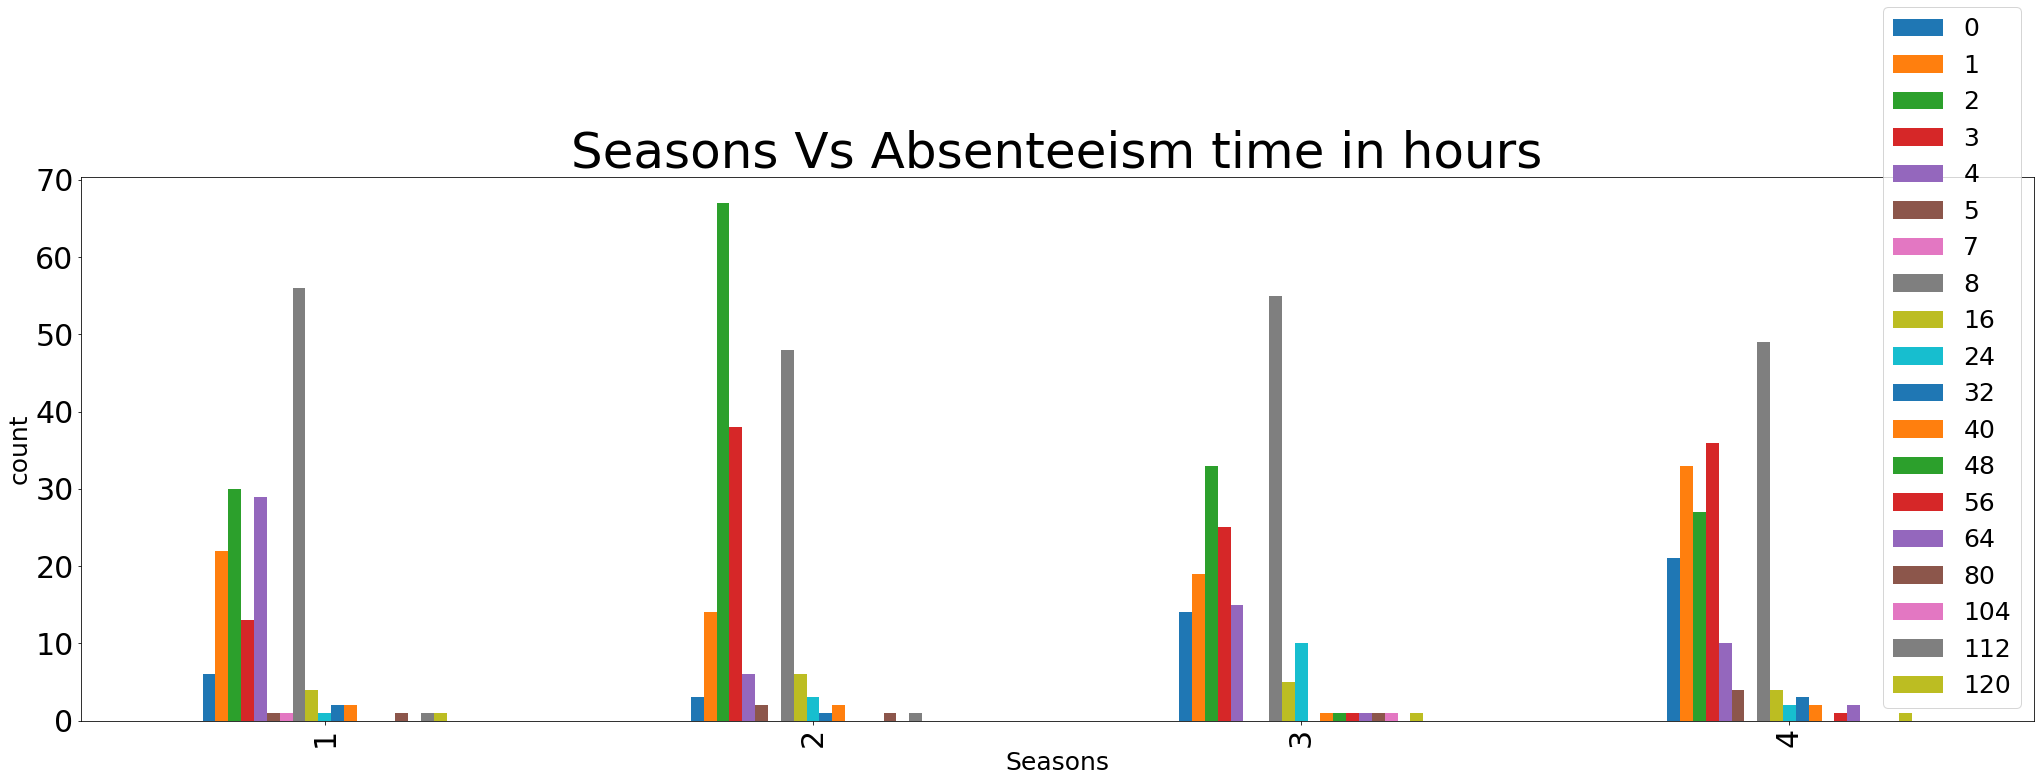

In [20]:
dis_bar('Seasons','Absenteeism time in hours')

'Seasons' VS 'Absenteeism time in hours'

The above graph states the distribution of the employees with respect to the Seasons 1,2,3,4.

1. Highest employees were absent for 2 hours in the second season, where as the highest employees were absent for 8 hours in season 1.
2. Under all the seasons, most of the employees were mostly show absenteeism in 2nd season and 4th season.

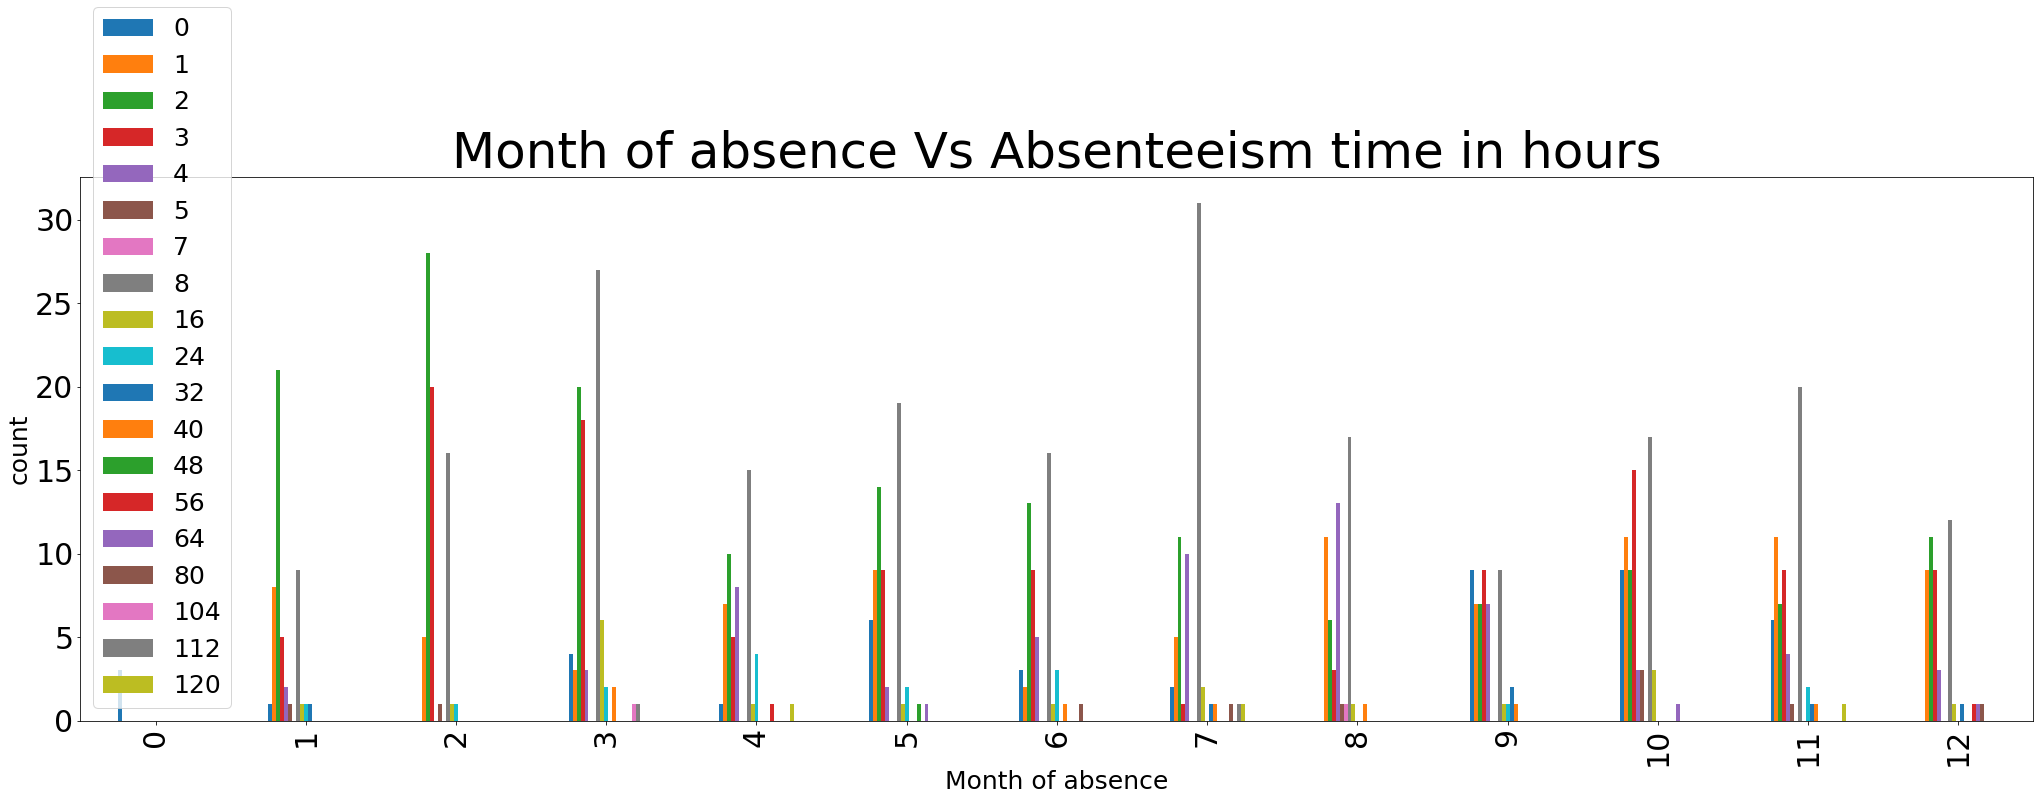

In [21]:
dis_bar('Month of absence','Absenteeism time in hours')

'Month of absence' VS 'Absenteeism time in hours'

The above graph states the distribution of the employees with respect to the Month of absence.

1. In the 7th month we could see the longest grey line which implies that 8 hours absense was highest in this month.
2. In the 2nd month we could see the longest green line which implies that 2 hours absense was highest in this month.

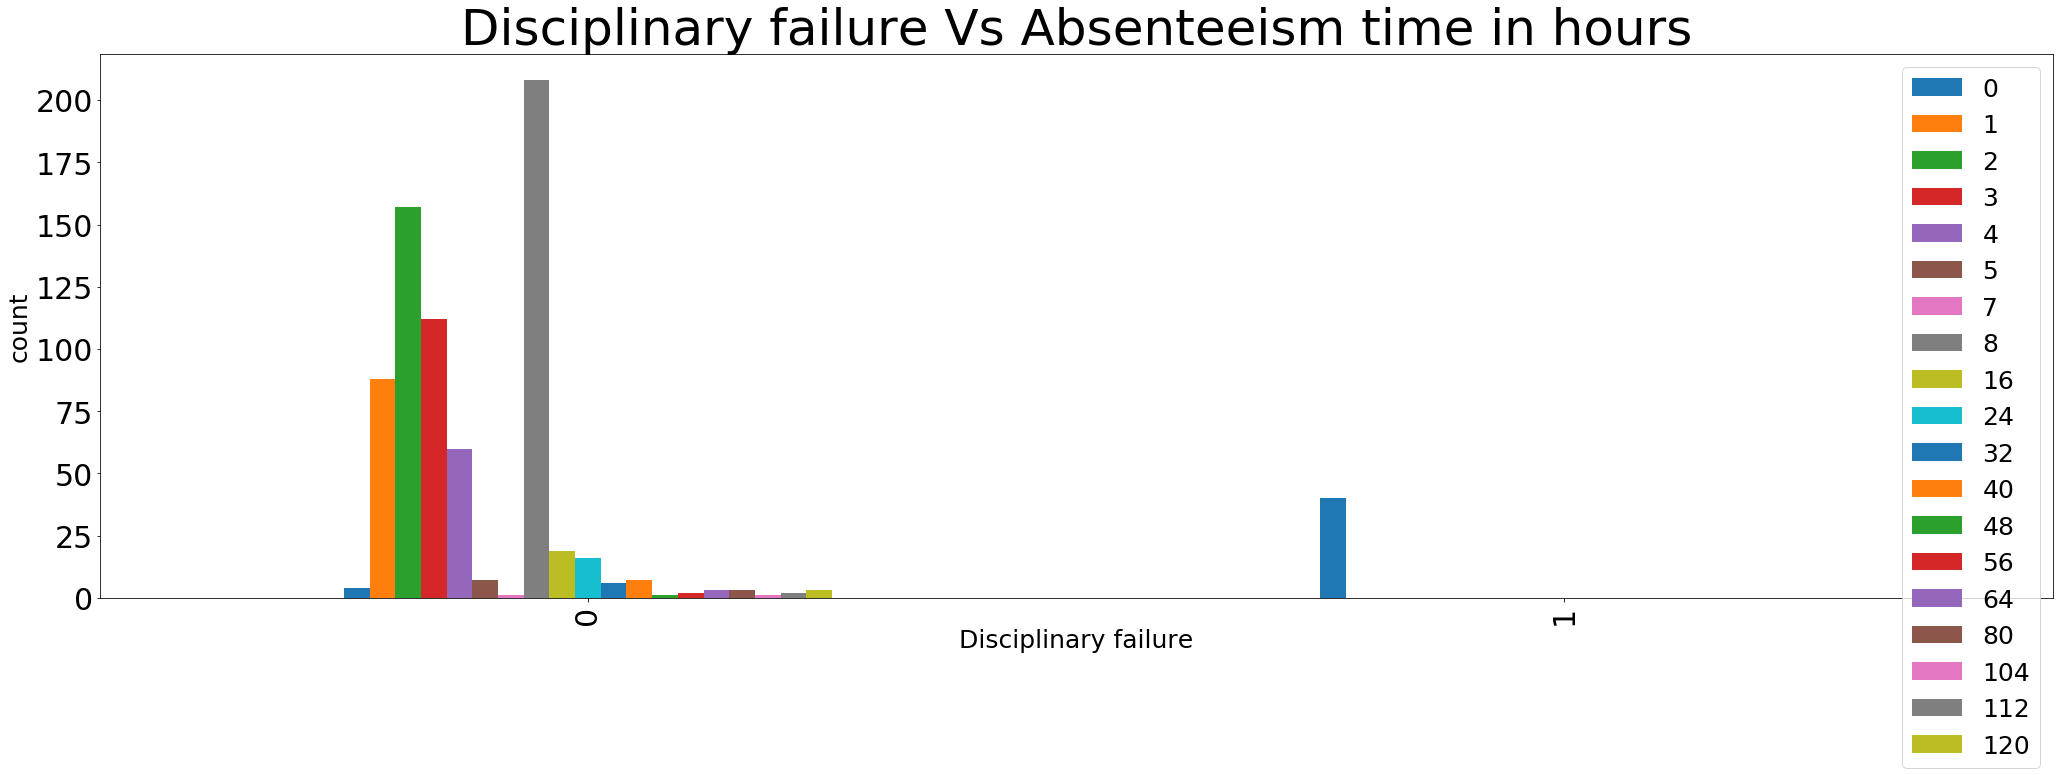

In [22]:
dis_bar('Disciplinary failure','Absenteeism time in hours')

'Disciplinary failure' VS 'Absenteeism time in hours'

The above graph states the distribution of the employees with respect to the Disciplinary failure.

1. We could see that almost all the employees who shows absence in hours are not having Disciplinary failure.

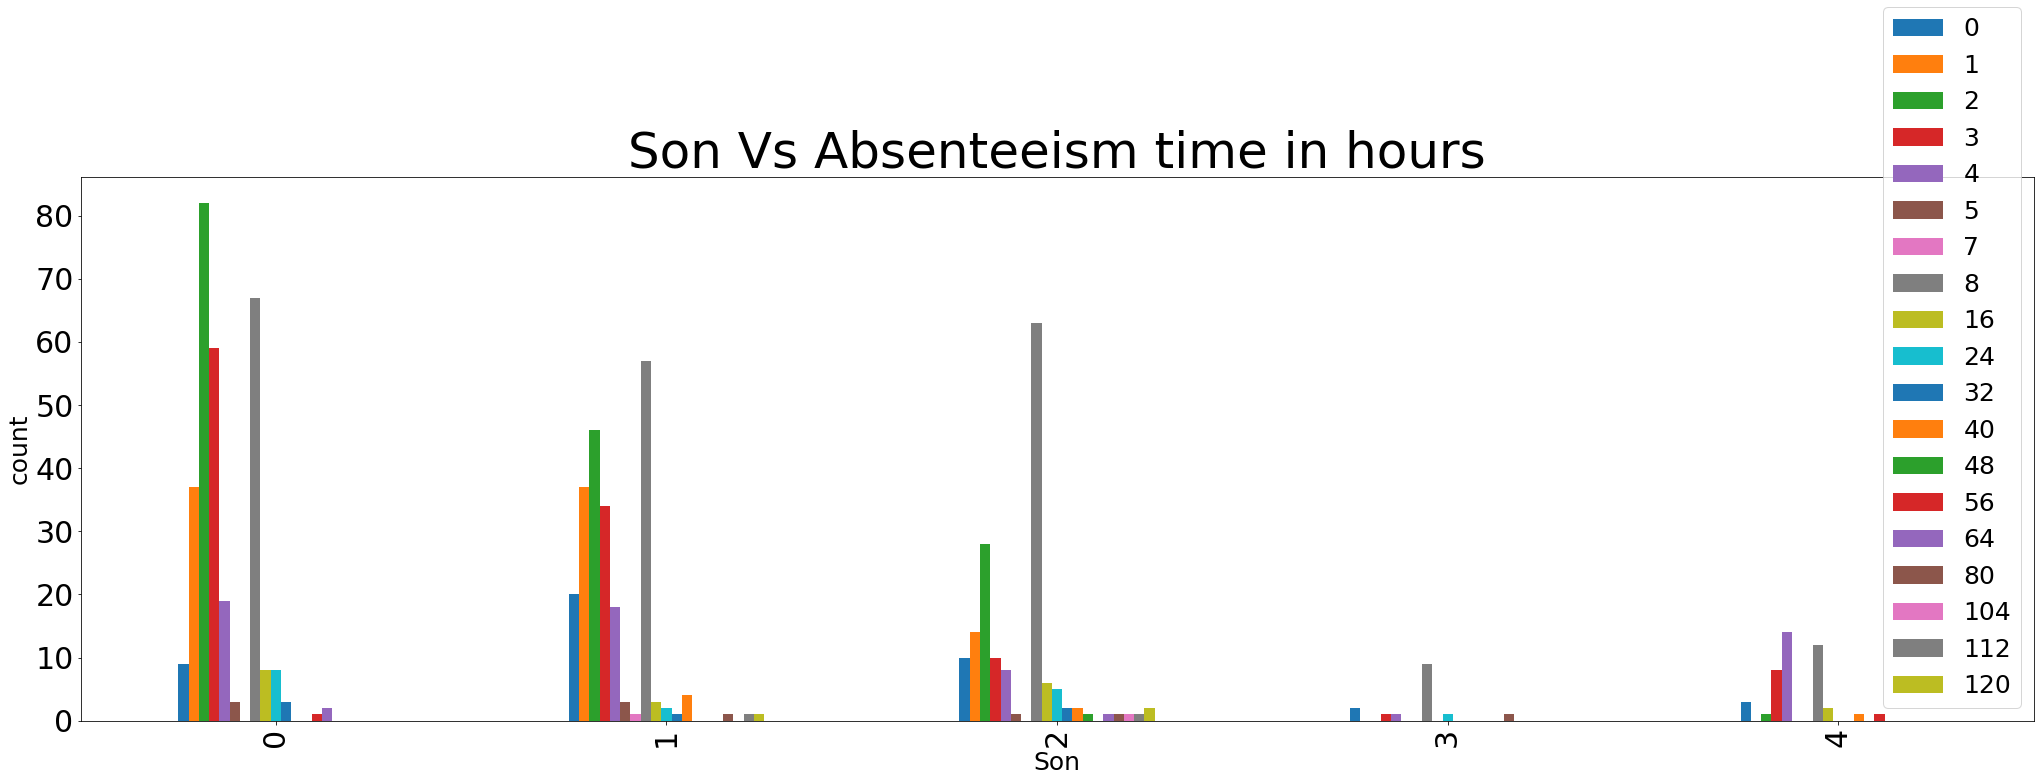

In [23]:
dis_bar('Son','Absenteeism time in hours')

'Son' VS 'Absenteeism time in hours'

The above graph states the distribution of the employees with respect to the relation in between employees son and absenteeism in hours.

1. We could see that the employees who have 0 son have taken the most hours of absenteeism. 
2. Employees with 1 0r 2 sons have also shown high a absenteeism in hours.

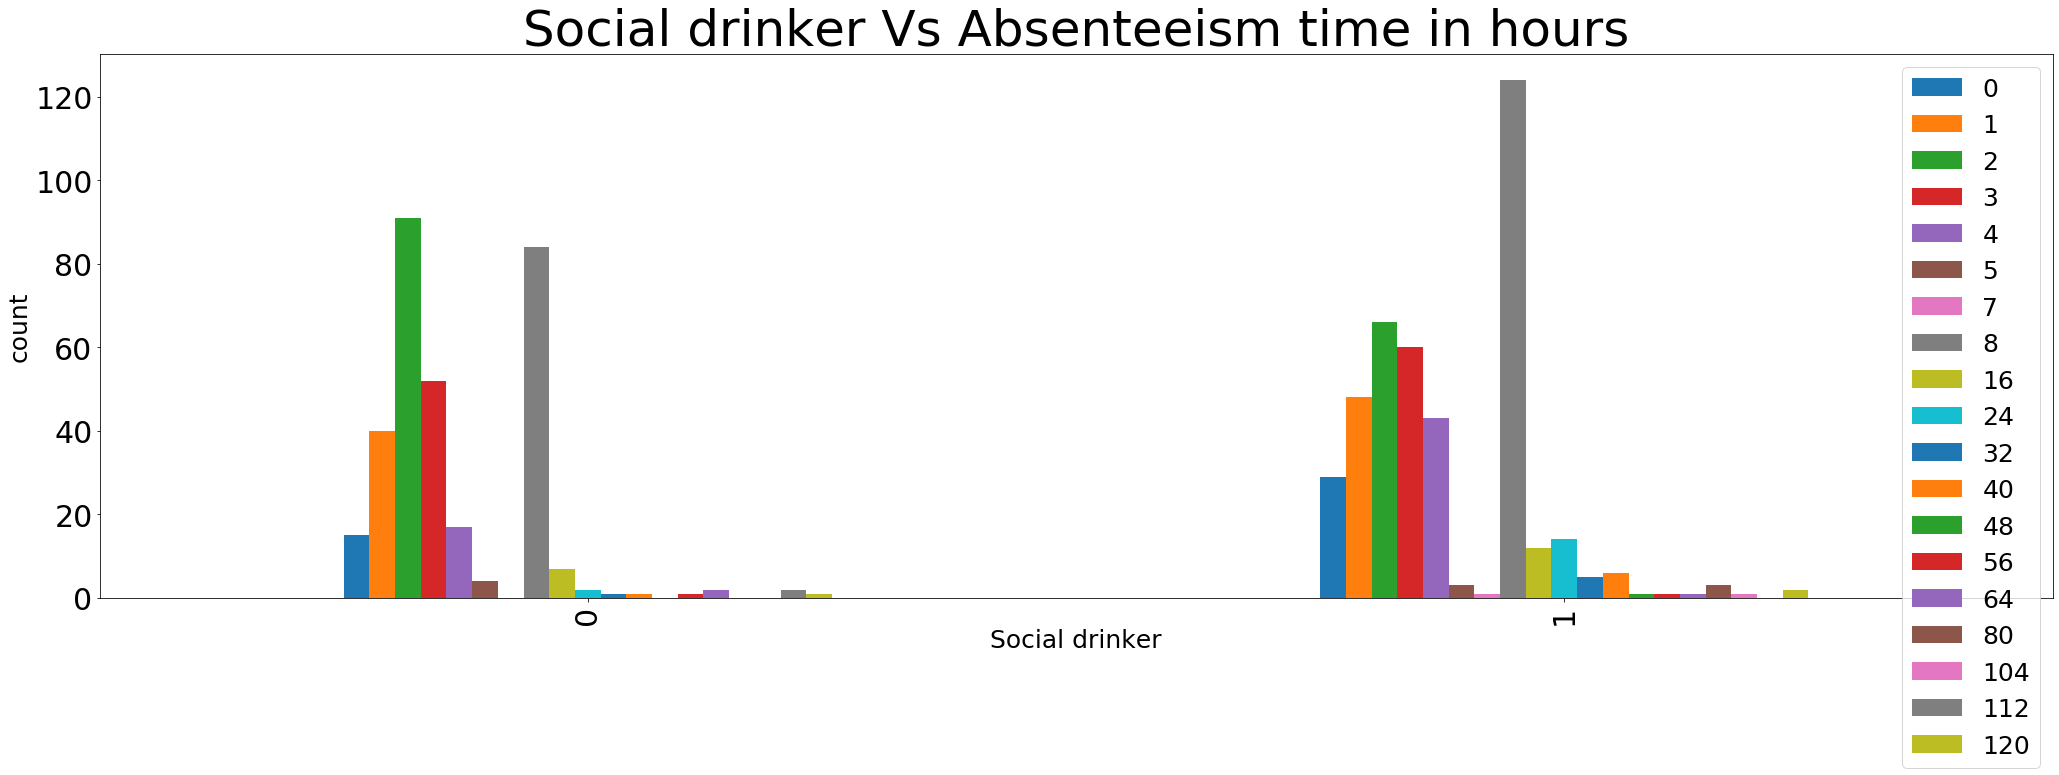

In [24]:
dis_bar('Social drinker','Absenteeism time in hours')

'Social drinker' VS 'Absenteeism time in hours'

The above graph states the distribution of the employees with respect to the relation in between Social drinkers and absenteeism in hours.

1. We could see that the employees who socially drink have shown a high amount of absenteeism where as the employees who dont drink they have shown 2 hours of absence mostly.

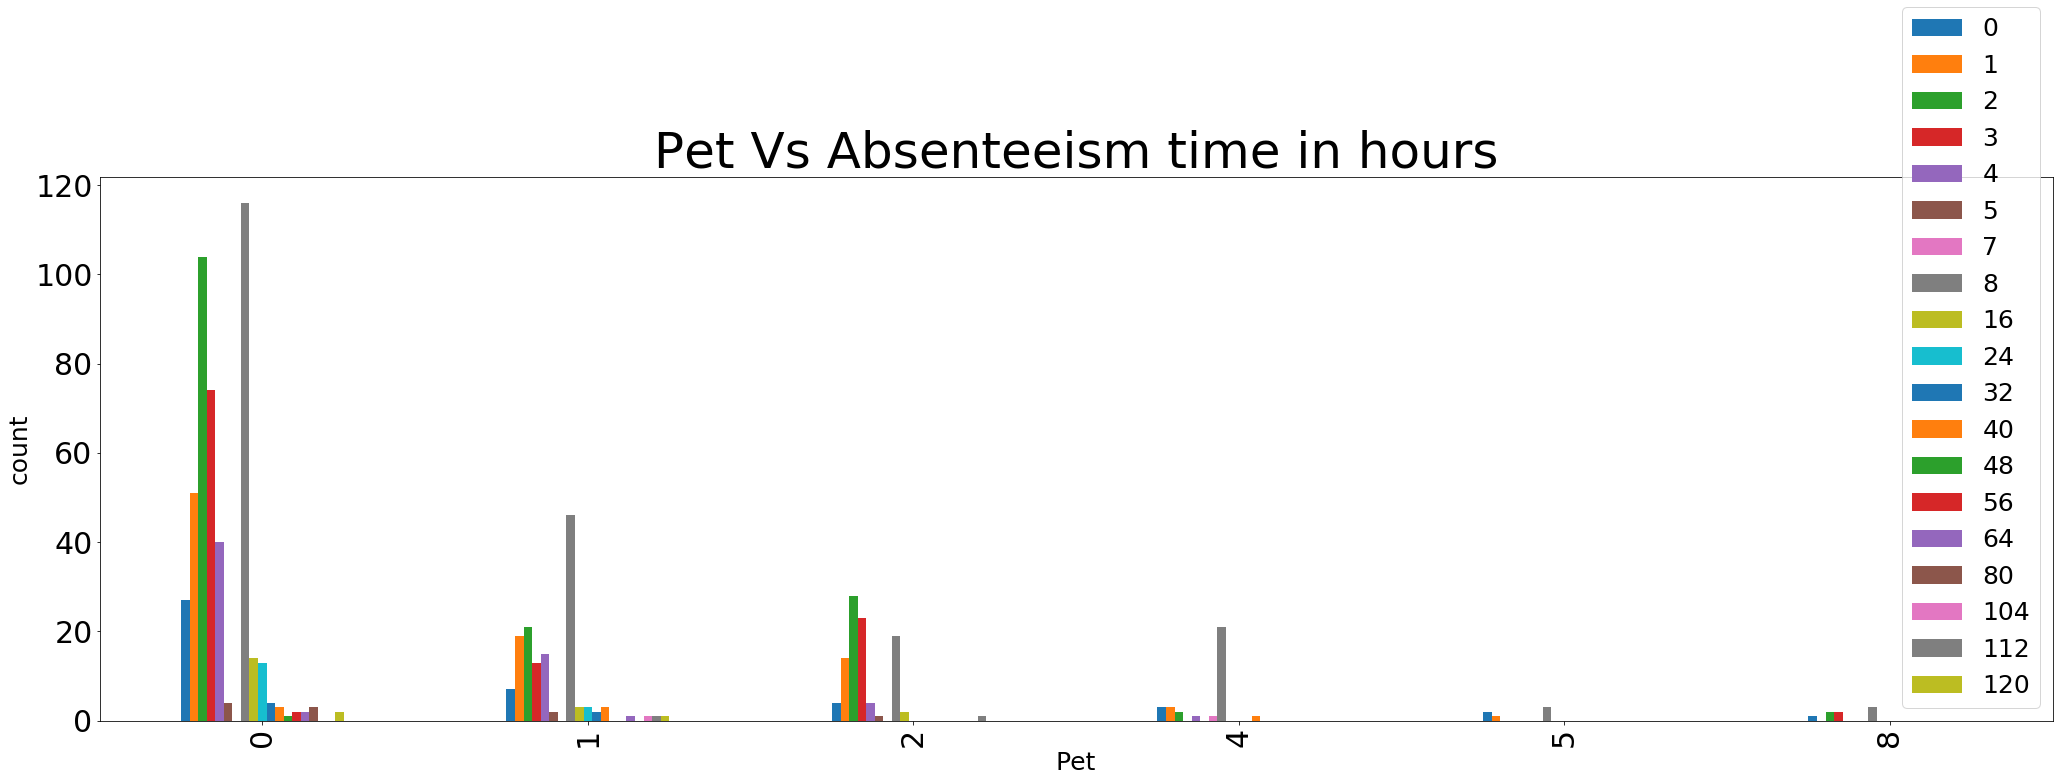

In [25]:
dis_bar('Pet','Absenteeism time in hours')

'Pet' VS 'Absenteeism time in hours'

The above graph states the distribution of the employees with respect to the relation in between Employees having pets with them  and absenteeism in hours.

1. We could see that the employees who have pets with them at home they have shown least amount of absenteeism where as employees who have 0 pets they show more hours of absenteeism.

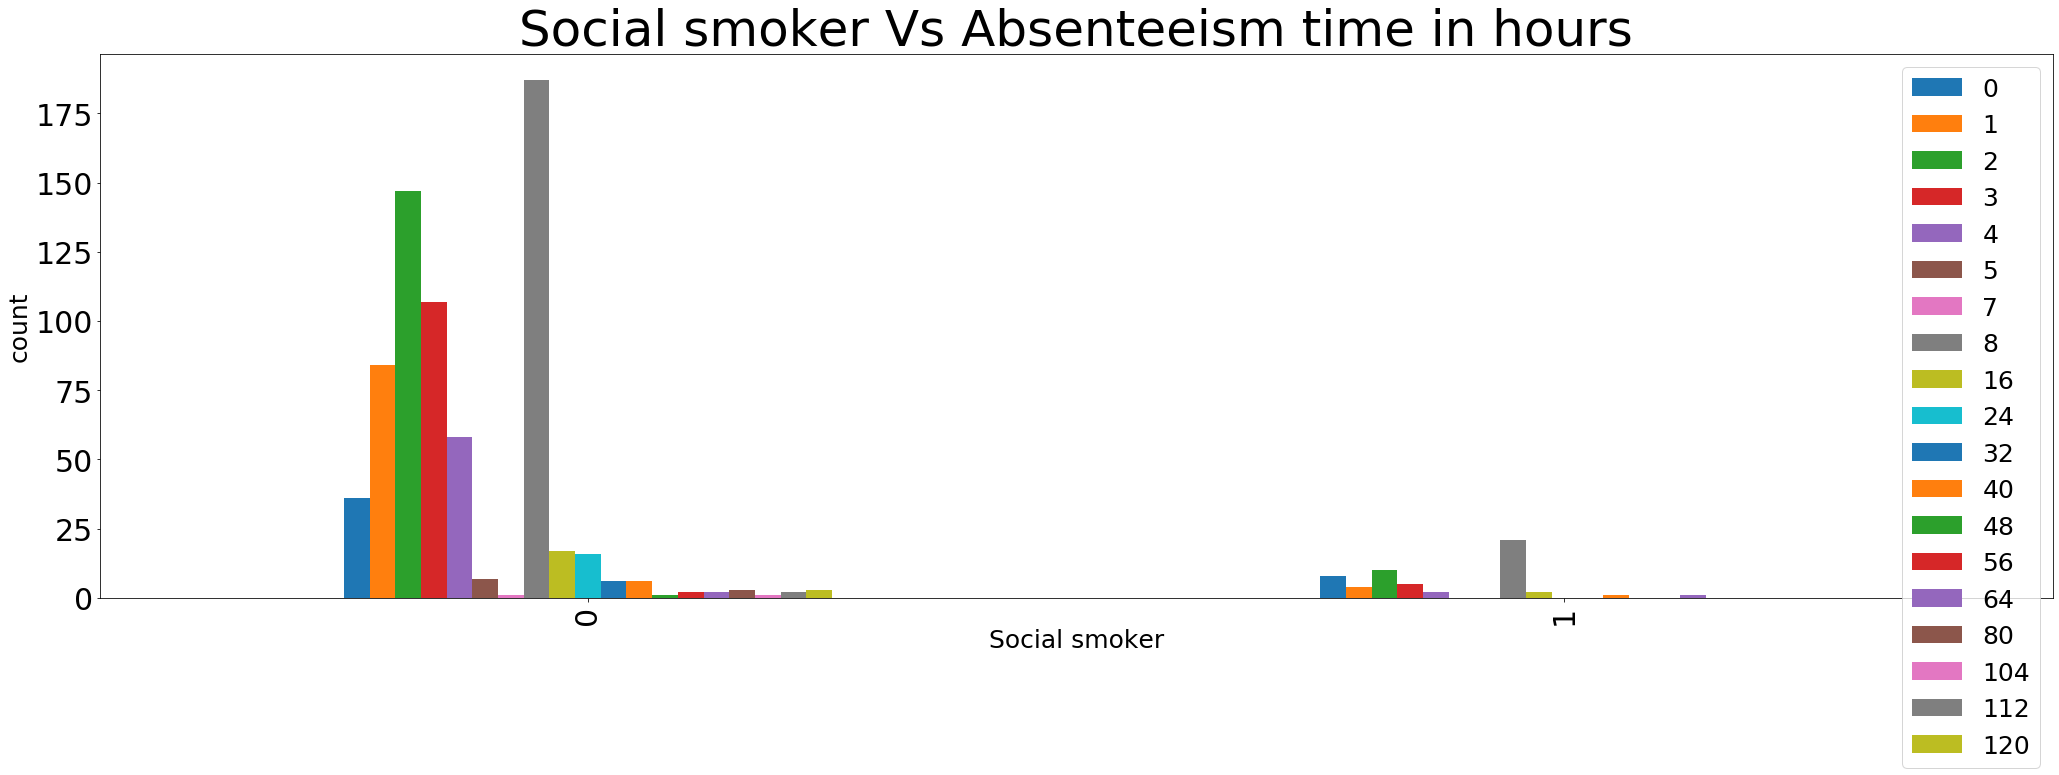

In [26]:
dis_bar('Social smoker','Absenteeism time in hours')

'Social smoker' VS 'Absenteeism time in hours'

The above graph states the distribution of the employees with respect to the relation in between Employees who socially smoke  and absenteeism in hours.

1. We could see that the employees who smoke socially takes more hours of absence where as employees who dont smoke they have shown a high amount of hours of absenteeism.

In [27]:
df.columns.to_series().groupby(df.dtypes).groups

{dtype('int64'): Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
        'Seasons', 'Transportation expense', 'Distance from Residence to Work',
        'Service time', 'Age', 'Hit target', 'Disciplinary failure',
        'Education', 'Son', 'Social drinker', 'Social smoker', 'Pet', 'Weight',
        'Height', 'Body mass index', 'Absenteeism time in hours'],
       dtype='object'),
 dtype('float64'): Index(['Work load Average/day '], dtype='object')}

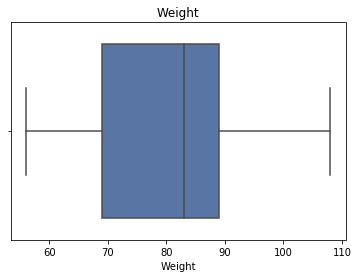

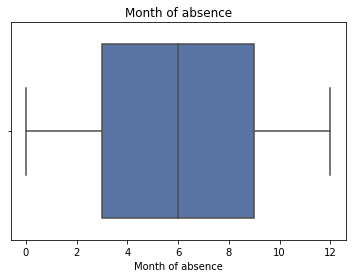

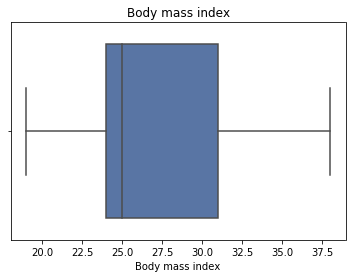

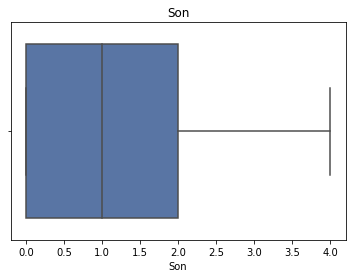

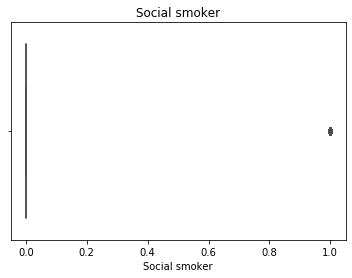

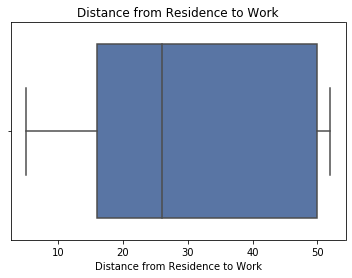

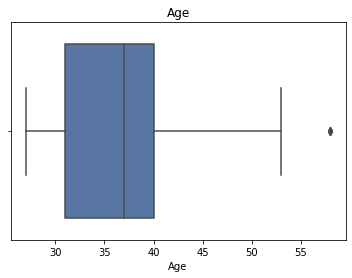

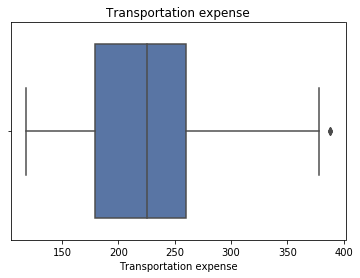

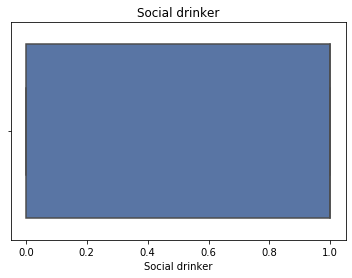

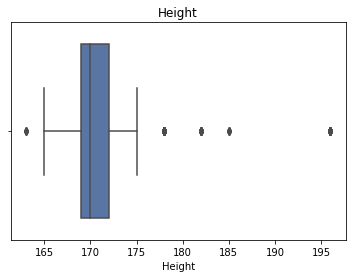

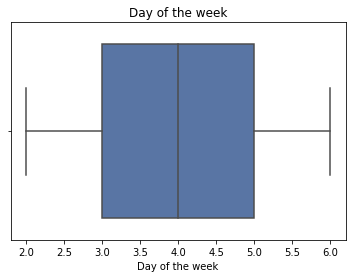

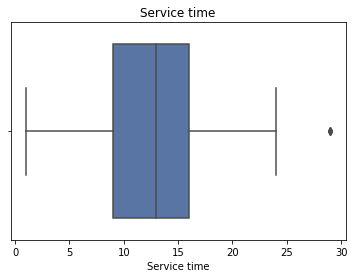

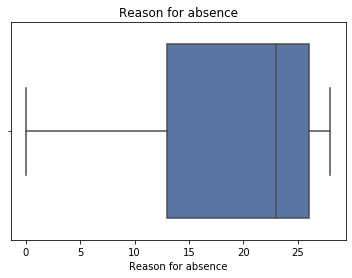

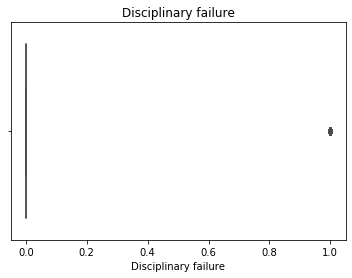

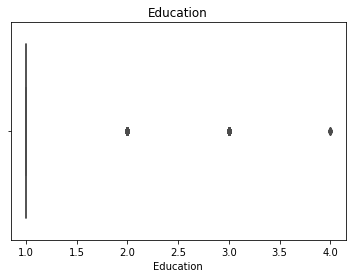

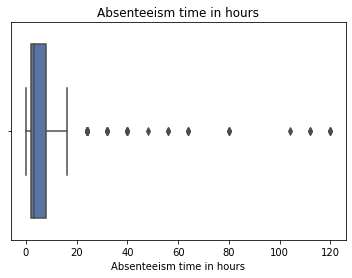

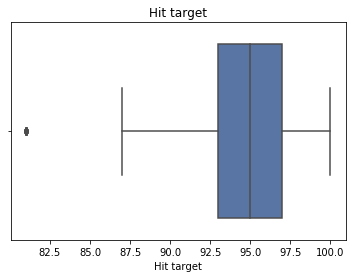

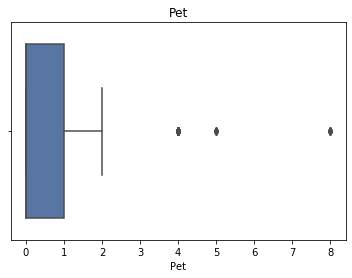

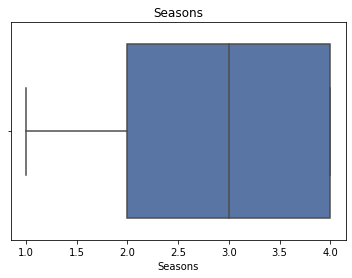

In [28]:
columns={'Reason for absence', 'Month of absence', 'Day of the week',
        'Seasons', 'Transportation expense', 'Distance from Residence to Work',
        'Service time', 'Age', 'Hit target', 'Disciplinary failure',
        'Education', 'Son', 'Social drinker', 'Social smoker', 'Pet', 'Weight',
        'Height', 'Body mass index', 'Absenteeism time in hours'}
for i in columns:
    plt.figure()
    plt.clf()
    sns.boxplot(df[i],palette="deep")
    plt.title(i)
    plt.show()

The plot box situated above are representing the minimum value , maximum value and showing the median value for the variables. In some of the variables such as Transportation expense, hight, age, pet, absenteeism time in hours etc..

The graph shows some poiters above or below the graph which is used to detect if there are any outliers presnt in the datasets or not. 

If the detection is accurate then we should be able to treat them in order to get the perfect outcome or result.

Outliers here are the observations that we find at the abnormal distance from other values.

<Figure size 1080x1080 with 0 Axes>

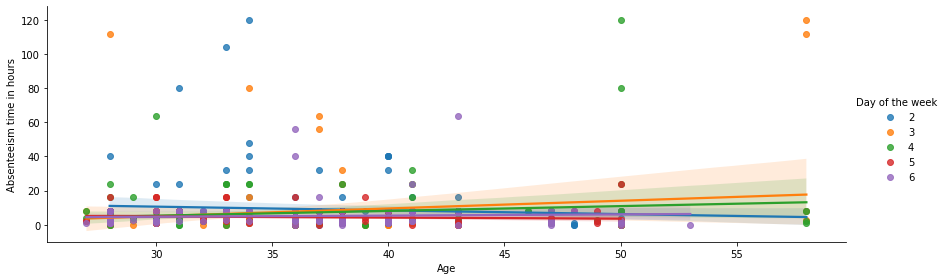

In [29]:
plt.figure(figsize=(15,15))
sns.lmplot(x='Age',y='Absenteeism time in hours',data=df,hue='Day of the week',size=4,aspect=3)

In [30]:
df[df['Day of the week']==6]['Absenteeism time in hours'].mean()

5.125

In [31]:
df[df['Day of the week']==2]['Absenteeism time in hours'].mean()

9.248447204968944

In [32]:
df[df['Day of the week']==5]['Absenteeism time in hours'].mean()

4.424

With the above graph and formulation we could see that the employees were absent from which day of the week , Highest absenteeism was in the 2nd day of the week and lowest is on the 5th day of the week.

It is also shown that the below the age of 40 employees have taken more hours of absenteeism where as the employees above age 40 shows less absenteeism.

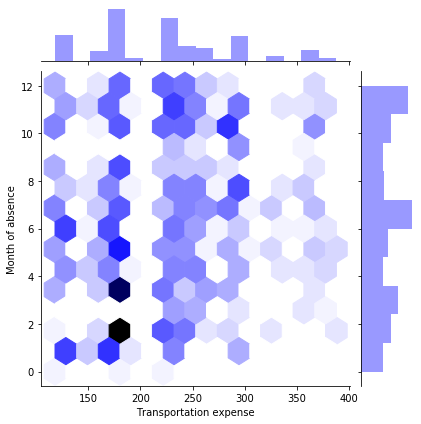

In [33]:
sns.jointplot(x='Transportation expense',y='Month of absence',data=df,kind='hex',color='blue')

With respect to the above graph it is shown that the Transportation expence was higher in the month from 10 to 12 which is winter than other seasons of the year.

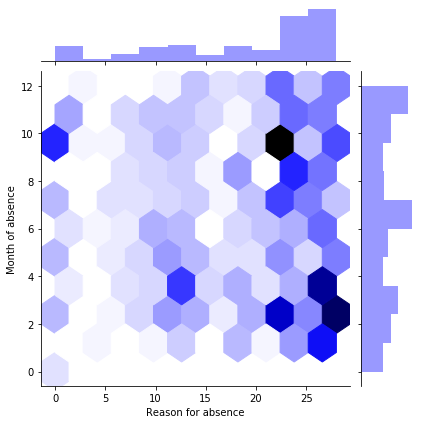

In [34]:
sns.jointplot(x='Reason for absence',y='Month of absence',data=df,kind='hex',color='blue')

With respect to the above graph it is shown that most of the absenteeism in hours of month were having the Reason of absent was in between 20 to 25 as there are darker shades.

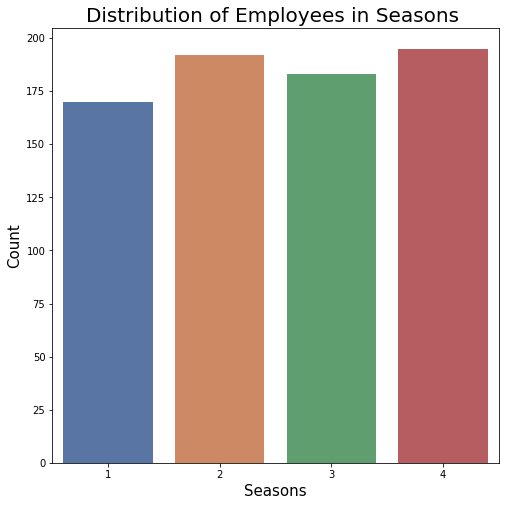

In [35]:
plt.figure(figsize=(8,8))
sns.countplot(x = df['Seasons'],palette='deep')
plt.xlabel('Seasons', fontsize= 15)
plt.ylabel('Count', fontsize= 15)
plt.title("Distribution of Employees in Seasons ",fontsize= 20)
plt.show()

In the above graph it states that almost all the seasons have the same level of employees, where season 4 is leading in the highest number of employees wh were registered for the absenteeism. 

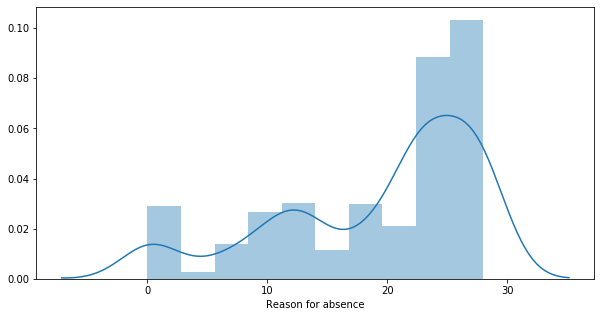

In [36]:
plt.figure(figsize=(10,5))
sns.distplot(df['Reason for absence'])

Distplot represents the univariate distribution of data i.e. data distribution of a variable that is Reason for absence which is against the density distribution. The seaborn. distplot() function accepts the data variable as an argument and returns the plot with the density distribution.

In [37]:
#reason of absence is blood donation 24 = 
df[df['Reason for absence']==24].count()

ID                                 3
Reason for absence                 3
Month of absence                   3
Day of the week                    3
Seasons                            3
Transportation expense             3
Distance from Residence to Work    3
Service time                       3
Age                                3
Work load Average/day              3
Hit target                         3
Disciplinary failure               3
Education                          3
Son                                3
Social drinker                     3
Social smoker                      3
Pet                                3
Weight                             3
Height                             3
Body mass index                    3
Absenteeism time in hours          3
dtype: int64

In [38]:
z= df.groupby('Reason for absence')
z['Absenteeism time in hours'].max()

Reason for absence
0       0
1      64
2      24
3       8
4       8
5       8
6     120
7      40
8       8
9     112
10     48
11    120
12    112
13    120
14     40
15      8
16      3
17      8
18     80
19    104
21      8
22     16
23     16
24      8
25      8
26     16
27      3
28     24
Name: Absenteeism time in hours, dtype: int64

The top reasons for absenteeism in hours (above 100 hours) are as follows:

1. 6.VI Diseases of the nervous system 
2. 9.IX Diseases of the circulatory system
3. 11.XI Diseases of the digestive system
4. 12.XII Diseases of the skin and subcutaneous tissue
5. 13.XIII Diseases of the musculoskeletal system and connective tissue
6. 19 XIX Injury, poisoning and certain other consequences of external causes

### Removing outliers

In [39]:
from scipy.stats import zscore
z_score=abs(zscore(df))
print(df.shape)

(740, 21)


In [40]:
df1=df.loc[(z_score<3).all(axis=1)]
print(df1.shape)

(576, 21)


After treating the outliers wit z score , we have successfully removed around 740 rows, Hence, our final shape of the dataset has become now (576,21)
Removing Columns as they are not in use to predict the below models:

### Skewness

In [41]:
df1.skew()

ID                                -0.058065
Reason for absence                -1.027334
Month of absence                   0.109690
Day of the week                    0.082048
Seasons                           -0.019301
Transportation expense             0.327717
Distance from Residence to Work    0.199294
Service time                      -0.153111
Age                                0.517042
Work load Average/day              1.019484
Hit target                        -0.461369
Disciplinary failure               0.000000
Education                          1.990046
Son                                1.447470
Social drinker                    -0.188822
Social smoker                      0.000000
Pet                                1.721238
Weight                            -0.128296
Height                             1.449688
Body mass index                    0.037118
Absenteeism time in hours          3.171312
dtype: float64

In [42]:
#Treatment for the skewed data:
for col in df1.columns:
    if df1.skew().loc[col]>0.55:
        df1[col]=np.log1p(df1[col])

In [43]:
df1.skew()

ID                                -0.058065
Reason for absence                -1.027334
Month of absence                   0.109690
Day of the week                    0.082048
Seasons                           -0.019301
Transportation expense             0.327717
Distance from Residence to Work    0.199294
Service time                      -0.153111
Age                                0.517042
Work load Average/day              0.669756
Hit target                        -0.461369
Disciplinary failure               0.000000
Education                          1.950332
Son                                0.575525
Social drinker                    -0.188822
Social smoker                      0.000000
Pet                                0.962203
Weight                            -0.128296
Height                             1.367054
Body mass index                    0.037118
Absenteeism time in hours          0.594507
dtype: float64

In [44]:
# Dropping ID column:
df1.drop("ID", axis=1,inplace=True)

### Assigning X AND Y Variables:

In [45]:
x=df1.iloc[:,0:19]
x.shape
x

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index
0,26,7,3,1,289,36,13,33,5.482945,97,0,0.693147,1.098612,1,0,0.693147,90,5.153292,30
2,23,7,4,1,179,51,18,38,5.482945,97,0,0.693147,0.000000,1,0,0.000000,89,5.141664,31
4,23,7,5,1,289,36,13,33,5.482945,97,0,0.693147,1.098612,1,0,0.693147,90,5.153292,30
5,23,7,6,1,179,51,18,38,5.482945,97,0,0.693147,0.000000,1,0,0.000000,89,5.141664,31
6,22,7,6,1,361,52,3,28,5.482945,97,0,0.693147,0.693147,1,0,1.609438,80,5.153292,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
733,22,7,4,1,225,26,9,28,5.582006,93,0,0.693147,0.693147,0,0,1.098612,69,5.135798,24
735,14,7,3,1,289,36,13,33,5.582006,93,0,0.693147,1.098612,1,0,0.693147,90,5.153292,30
736,11,7,3,1,235,11,14,37,5.582006,93,0,1.386294,0.693147,0,0,0.693147,88,5.153292,29
738,0,0,4,2,231,35,14,39,5.606607,95,0,0.693147,1.098612,1,0,1.098612,100,5.141664,35


In [46]:
y=df1.iloc[:,-1]
y.shape
y

0      1.609438
2      1.098612
4      1.098612
5      1.098612
6      2.197225
         ...   
733    2.197225
735    2.197225
736    1.609438
738    0.000000
739    0.000000
Name: Absenteeism time in hours, Length: 576, dtype: float64

### Standard Scaler:
To bring all the values at the same scale

In [47]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler(copy=True, with_mean=True, with_std=True).fit(x)
df1_scaler = scaler.transform(x)
x = pd.DataFrame(df1_scaler)
x.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.724903,0.207428,-0.657084,-1.403798,1.017195,0.338869,0.184695,-0.444868,-0.805371,0.668393,0.0,-0.431540,1.177318,0.910259,0.0,0.669611,0.928770,0.384762,0.742421
1,0.305261,0.207428,0.042510,-1.403798,-0.651616,1.356538,1.388141,0.385476,-0.805371,0.668393,0.0,-0.431540,-0.949984,0.910259,0.0,-0.729248,0.847368,-0.251093,0.982800
2,0.305261,0.207428,0.742105,-1.403798,1.017195,0.338869,0.184695,-0.444868,-0.805371,0.668393,0.0,-0.431540,1.177318,0.910259,0.0,0.669611,0.928770,0.384762,0.742421
3,0.305261,0.207428,1.441699,-1.403798,-0.651616,1.356538,1.388141,0.385476,-0.805371,0.668393,0.0,-0.431540,-0.949984,0.910259,0.0,-0.729248,0.847368,-0.251093,0.982800
4,0.165380,0.207428,1.441699,-1.403798,2.109508,1.424382,-2.222195,-1.275212,-0.805371,0.668393,0.0,-0.431540,0.392194,0.910259,0.0,2.518801,0.114754,0.384762,0.021284
5,0.305261,0.207428,1.441699,-1.403798,0.577236,1.288693,-0.296683,0.053338,-0.805371,0.668393,0.0,-0.431540,2.166457,0.910259,0.0,-0.729248,-1.106271,-0.894430,-0.940233
6,0.165380,0.207428,-1.356679,-1.403798,0.197961,-1.357244,0.425384,0.219407,-0.805371,0.668393,0.0,2.446748,0.392194,-1.098588,0.0,0.669611,0.765967,0.384762,0.502042
7,-2.772117,0.207428,-1.356679,-1.403798,0.577236,1.288693,-0.296683,0.053338,-0.805371,0.668393,0.0,-0.431540,2.166457,0.910259,0.0,-0.729248,-1.106271,-0.894430,-0.940233
8,-2.772117,0.207428,-0.657084,-1.403798,0.577236,1.288693,-0.296683,0.053338,-0.805371,0.668393,0.0,-0.431540,2.166457,0.910259,0.0,-0.729248,-1.106271,-0.894430,-0.940233
9,-1.373309,0.207428,0.042510,-1.403798,0.577236,1.288693,-0.296683,0.053338,-0.805371,0.668393,0.0,-0.431540,2.166457,0.910259,0.0,-0.729248,-1.106271,-0.894430,-0.940233


# MODEL SELECTION
Using different types of model in oder to acquire optimum solution:

In [48]:
def maxr2_score(regr,x,y):
    max_r_score=0
    for r_state in range(42,100):
        x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.20,random_state=r_state)
        regr.fit(x_train,y_train)
        y_pred=regr.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        print("r2_score corresponding to random state: ",r_state,"is: ",r2_scr)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print()
    print()
    print("max r2_score correspondint to: ",final_r_state,"is ",max_r_score)
    return final_r_state

### Linear Regression

In [49]:
lreg=LinearRegression()
r_state=maxr2_score(lreg,x,y)

r2_score corresponding to random state:  42 is:  0.2094619065019615
r2_score corresponding to random state:  43 is:  0.24023929349592432
r2_score corresponding to random state:  44 is:  0.24529168602547458
r2_score corresponding to random state:  45 is:  0.20025351919368428
r2_score corresponding to random state:  46 is:  0.30535994139314404
r2_score corresponding to random state:  47 is:  0.2902745110888554
r2_score corresponding to random state:  48 is:  0.20750945509747054
r2_score corresponding to random state:  49 is:  0.19560060458267003
r2_score corresponding to random state:  50 is:  0.2544475663489699
r2_score corresponding to random state:  51 is:  0.09072848699186065
r2_score corresponding to random state:  52 is:  0.2478893671284449
r2_score corresponding to random state:  53 is:  0.13466987648129647
r2_score corresponding to random state:  54 is:  0.21511384556567947
r2_score corresponding to random state:  55 is:  0.23151667608837379
r2_score corresponding to random state

### KNeighborsRegressor

In [50]:
from sklearn.neighbors import KNeighborsRegressor
neighbors={"n_neighbors":range(1,30)}
knn= KNeighborsRegressor()
gknn=GridSearchCV(knn,neighbors,cv=10)
gknn.fit(x,y)
gknn.best_params_

{'n_neighbors': 14}

In [51]:
knn= KNeighborsRegressor(n_neighbors=14)
r_state=maxr2_score(knn,x,y)

r2_score corresponding to random state:  42 is:  0.24295935942615832
r2_score corresponding to random state:  43 is:  0.11012142302703831
r2_score corresponding to random state:  44 is:  0.13472410969634896
r2_score corresponding to random state:  45 is:  0.08225694783484383
r2_score corresponding to random state:  46 is:  0.3070198326664718
r2_score corresponding to random state:  47 is:  0.2098376081449299
r2_score corresponding to random state:  48 is:  0.20934691971389163
r2_score corresponding to random state:  49 is:  0.16858234337540645
r2_score corresponding to random state:  50 is:  0.18106711274653775
r2_score corresponding to random state:  51 is:  0.059952904044808575
r2_score corresponding to random state:  52 is:  0.1907165564241774
r2_score corresponding to random state:  53 is:  0.18168961925152338
r2_score corresponding to random state:  54 is:  0.1409740488224258
r2_score corresponding to random state:  55 is:  0.16241233958062407
r2_score corresponding to random stat

### Lasso

In [52]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
isreh=Lasso()
parameters={"alpha":[0.001,0.01,0.1,1]}
grid=GridSearchCV(isreh,parameters,cv=10)
grid.fit(x,y)
grid.best_params_

{'alpha': 0.01}

In [53]:
max_r_score=0
for r_state in range(42,100):
    x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=.20,random_state=r_state)
    lasso=Lasso(alpha=0.01)
    lasso.fit(x_train,y_train)
    y_pred=lasso.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    print("r2_score corresponding to random state: ",r_state,"is: ",r2_scr)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
print()
print()
print("max r2_score correspondint to: ",final_r_state,"is ",max_r_score)

r2_score corresponding to random state:  42 is:  0.22470565820124155
r2_score corresponding to random state:  43 is:  0.24631541414489821
r2_score corresponding to random state:  44 is:  0.2514221683927671
r2_score corresponding to random state:  45 is:  0.19826332031409055
r2_score corresponding to random state:  46 is:  0.2745500619645186
r2_score corresponding to random state:  47 is:  0.2649100170801798
r2_score corresponding to random state:  48 is:  0.16919558959258651
r2_score corresponding to random state:  49 is:  0.2006602110884257
r2_score corresponding to random state:  50 is:  0.22648565744797122
r2_score corresponding to random state:  51 is:  0.10018307944533067
r2_score corresponding to random state:  52 is:  0.25760005436660627
r2_score corresponding to random state:  53 is:  0.146402939909001
r2_score corresponding to random state:  54 is:  0.20481047226977322
r2_score corresponding to random state:  55 is:  0.23060501998004335
r2_score corresponding to random state: 

### Errors

In [54]:
print('Mean absolute error : ',mean_absolute_error(y_test,y_pred))
print('Mean Squared error : ',mean_squared_error(y_test,y_pred))
print("RMSE is : ",np.sqrt(mean_squared_error(y_test,y_pred)))

Mean absolute error :  0.450466485411825
Mean Squared error :  0.35740620485204144
RMSE is :  0.597834596566677


### RandomForestRegressor

In [55]:
from math import log
from math import sqrt
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
estimator = RandomForestRegressor()
param_grid = { 
            "n_estimators"      : [10,50,100,200,500],
            "max_features"      : ["auto", "sqrt", "log2"],
            "min_samples_split" : [2,4,8],
            "bootstrap": [True, False],
            }

grid = GridSearchCV(estimator, param_grid, n_jobs=-1, cv=5)

grid.fit(x_train, y_train)

grid.best_params_

{'bootstrap': True,
 'max_features': 'log2',
 'min_samples_split': 8,
 'n_estimators': 50}

In [83]:
rr=RandomForestRegressor(bootstrap=True,max_features='auto',min_samples_split=2,n_estimators=300)
rr.fit(x_train, y_train)
rr.score(x_train,y_train)

0.8782626761483405

In [84]:
pred=rr.predict(x_test)
pred

array([1.03755365, 2.47181301, 1.18600984, 1.30293198, 1.1063666 ,
       1.45723955, 1.2192701 , 1.28262187, 1.77221966, 1.72249377,
       2.37916885, 1.89996675, 2.12954009, 1.99880234, 1.81117072,
       1.53081702, 1.68001416, 2.17813109, 2.19531399, 1.32580345,
       1.37514858, 0.9683845 , 1.4621926 , 1.41112208, 2.04746462,
       1.92053638, 2.28465823, 1.335906  , 2.14284577, 1.63382768,
       1.32945389, 2.34450186, 2.11477117, 2.0850569 , 1.32590538,
       2.29911441, 2.05623611, 1.18095538, 2.34190715, 2.07838338,
       2.22270946, 1.03755365, 1.10193498, 1.27175418, 2.28841626,
       1.71197105, 2.17473476, 1.11008248, 1.1814203 , 0.85718719,
       1.18714502, 1.69377081, 1.35302344, 2.49141619, 1.26054767,
       1.80882494, 1.25582256, 1.2163101 , 1.37514858, 2.11860832,
       1.3250457 , 2.91151169, 1.9755012 , 1.32939845, 1.25718636,
       1.81618652, 2.29889975, 1.87867824, 1.33640852, 1.79142756,
       2.18985627, 2.34906042, 1.02487117, 2.01062733, 1.29323

In [85]:
print("Test Results for Random Forest Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mean_squared_error(y_test,pred)))
print("R-squared: ", r2_score(y_test,pred))

Test Results for Random Forest Regressor Model:
--------------------------------------------------
Root mean squared error:  0.5084412060718216
R-squared:  0.38465828435368343


### DecisionTreeRegressor

In [59]:
from sklearn.tree import DecisionTreeRegressor
depth =list(range(3,30))
param_grid =dict(max_depth =depth)
tree =GridSearchCV(DecisionTreeRegressor(),param_grid,cv =10)
tree.fit(x_train,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                                       15, 16, 17, 18, 19, 20, 21, 22, 23,

In [60]:
print(tree.best_estimator_)
tree.best_params_

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=3,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')


{'max_depth': 3}

In [61]:
y_train_pred =tree.predict(x_train)
y_test_pred =tree.predict(x_test)

In [62]:
print("Train Results for Decision Tree Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mean_squared_error(y_train.values, y_train_pred)))
print("R-squared: ", r2_score(y_train.values, y_train_pred))

Train Results for Decision Tree Regressor Model:
--------------------------------------------------
Root mean squared error:  0.5179661164699264
R-squared:  0.40779784146347264


In [63]:
print("Test Results for Decision Tree Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mean_squared_error(y_test, y_test_pred)))
print("R-squared: ", r2_score(y_test, y_test_pred))

Test Results for Decision Tree Regressor Model:
--------------------------------------------------
Root mean squared error:  0.560416481794145
R-squared:  0.2524217177204163


### GradientBoostingRegressor

In [64]:
from sklearn.ensemble import GradientBoostingRegressor
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.20)
model = GradientBoostingRegressor()
parameters = {'learning_rate': [0.001,0.01,0.1,0.02,0.03,1],
              'subsample'    : [0.9, 0.5, 0.2],
              'n_estimators' : [100,500,1000],
              'max_depth'    : [4,6,8]}
grid = GridSearchCV(estimator=model, param_grid = parameters, cv = 2, n_jobs=-1)
grid.fit(x_train, y_train)
grid.best_params_

{'learning_rate': 0.03, 'max_depth': 4, 'n_estimators': 100, 'subsample': 0.5}

In [65]:
gbr= GradientBoostingRegressor(learning_rate=0.03,max_depth=4,n_estimators=100,subsample=0.5)
gbr.fit(x_train, y_train)
gbr.score(x_train,y_train)

0.6583093716880597

In [66]:
pred_gbr=gbr.predict(x_test)

In [67]:
print("Test Results for GradientBoostingRegressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mean_squared_error(y_test,pred_gbr)))
print("R-squared: ", r2_score(y_test,pred_gbr))

Test Results for GradientBoostingRegressor Model:
--------------------------------------------------
Root mean squared error:  0.5063463103009377
R-squared:  0.3943446436580862


### Cross_val_score

In [86]:
print("Mean r2 score for Linear Regression: ",cross_val_score(lreg,x,y,cv=5,scoring="r2").mean())
print("Standard Deviation r2 score for Linear Regression: ",cross_val_score(lreg,x,y,cv=5,scoring="r2").std())
print()
print()
print("Mean r2 score for knn: ",cross_val_score(knn,x,y,cv=5,scoring="r2").mean())
print("Standard Deviation r2 score for knn: ",cross_val_score(knn,x,y,cv=5,scoring="r2").std())
print()
print()
print("Mean r2 score for R_forest Regressor ",cross_val_score(rr,x,y,cv=5,scoring="r2").mean())
print("Standard Deviation r2 score for R_forst Regressor ",cross_val_score(rr,x,y,cv=5,scoring="r2").std())
print()
print()
print("Mean r2 score for lasso ",cross_val_score(lasso,x,y,cv=5,scoring="r2").mean())
print("Standard Deviation r2 score for lasso ",cross_val_score(lasso,x,y,cv=5,scoring="r2").std())
print()
print()
print("Mean r2 score for GBR ",cross_val_score(gbr,x,y,cv=5,scoring="r2").mean())
print("Standard Deviation r2 score for GBR ",cross_val_score(gbr,x,y,cv=5,scoring="r2").std())
print()
print()
print("Mean r2 score for DTC ",cross_val_score(tree,x,y,cv=5,scoring="r2").mean())
print("Standard Deviation r2 score for DTC ",cross_val_score(tree,x,y,cv=5,scoring="r2").std())

Mean r2 score for Linear Regression:  0.16367862693353433
Standard Deviation r2 score for Linear Regression:  0.08512484490026986


Mean r2 score for knn:  0.06454602761117656
Standard Deviation r2 score for knn:  0.0797870306103164


Mean r2 score for R_forest Regressor  0.3043584394448081
Standard Deviation r2 score for R_forst Regressor  0.10030312903594904


Mean r2 score for lasso  0.168483316708316
Standard Deviation r2 score for lasso  0.10498167629253422


Mean r2 score for GBR  0.3283893317633041
Standard Deviation r2 score for GBR  0.0975787036105072


Mean r2 score for DTC  0.25521551702924455
Standard Deviation r2 score for DTC  0.11691022402755519


### Epsilon-Support Vector Regression

In [69]:
from sklearn.svm import SVR

In [70]:
svr_regressor = SVR(kernel='rbf')

In [71]:
svr_regressor.fit(x,y.ravel())

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [72]:
max_r_score=0
for r_state in range(42,100):
    x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=.20,random_state=r_state)
    svr= SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
    svr.fit(x_train,y_train)
    y_pred=svr.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    print("r2_score corresponding to random state: ",r_state,"is: ",r2_scr)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
print()
print()
print("max r2_score correspondint to: ",final_r_state,"is ",max_r_score)

r2_score corresponding to random state:  42 is:  0.17689703669782053
r2_score corresponding to random state:  43 is:  0.16775852497070953
r2_score corresponding to random state:  44 is:  0.2617048290970645
r2_score corresponding to random state:  45 is:  0.2231486216375197
r2_score corresponding to random state:  46 is:  0.30510721081310543
r2_score corresponding to random state:  47 is:  0.3092932203402181
r2_score corresponding to random state:  48 is:  0.2409672961929229
r2_score corresponding to random state:  49 is:  0.31732993037145163
r2_score corresponding to random state:  50 is:  0.30318730944282823
r2_score corresponding to random state:  51 is:  0.033005230162250765
r2_score corresponding to random state:  52 is:  0.25053648699641495
r2_score corresponding to random state:  53 is:  0.1975418973404477
r2_score corresponding to random state:  54 is:  0.1896729455039835
r2_score corresponding to random state:  55 is:  0.2902851640174484
r2_score corresponding to random state: 

In [73]:
print("Mean r2 score for SVR ",cross_val_score(svr,x,y,cv=5,scoring="r2").mean())
print("Standard Deviation r2 score for SVR ",cross_val_score(svr,x,y,cv=5,scoring="r2").std())

Mean r2 score for SVR  0.13042101200924433
Standard Deviation r2 score for SVR  0.12643408306100407


## Choosing a Model:

Random Forest Regressor = rr

From the Exploratory data Analysis and the Various models tried abve we could see that among all the prediction RandomForestRegressor is giving the best output or prediction result which is 88%. Other than this Random Forest classifier no such output is promising.

Hence, I am going to choose the rr i.e rr=RandomForestRegressorn model.
Through this model we will be able to predict the absenteeism in hour for all the employees.

## Saving the file:

In [87]:
from sklearn.externals import joblib

In [88]:
joblib.dump(rr,'Project_16_Absenteeism_at_Work.obj')

['Project_16_Absenteeism_at_Work.obj']

In [89]:
#loading back the model:
model=joblib.load('Project_16_Absenteeism_at_Work.obj')

In [90]:
#Pridicting x_test Random Forest Regressor = rr
rr.predict(x_test)

array([1.03755365, 2.47181301, 1.18600984, 1.30293198, 1.1063666 ,
       1.45723955, 1.2192701 , 1.28262187, 1.77221966, 1.72249377,
       2.37916885, 1.89996675, 2.12954009, 1.99880234, 1.81117072,
       1.53081702, 1.68001416, 2.17813109, 2.19531399, 1.32580345,
       1.37514858, 0.9683845 , 1.4621926 , 1.41112208, 2.04746462,
       1.92053638, 2.28465823, 1.335906  , 2.14284577, 1.63382768,
       1.32945389, 2.34450186, 2.11477117, 2.0850569 , 1.32590538,
       2.29911441, 2.05623611, 1.18095538, 2.34190715, 2.07838338,
       2.22270946, 1.03755365, 1.10193498, 1.27175418, 2.28841626,
       1.71197105, 2.17473476, 1.11008248, 1.1814203 , 0.85718719,
       1.18714502, 1.69377081, 1.35302344, 2.49141619, 1.26054767,
       1.80882494, 1.25582256, 1.2163101 , 1.37514858, 2.11860832,
       1.3250457 , 2.91151169, 1.9755012 , 1.32939845, 1.25718636,
       1.81618652, 2.29889975, 1.87867824, 1.33640852, 1.79142756,
       2.18985627, 2.34906042, 1.02487117, 2.01062733, 1.29323